# Galtonbrett

In dieser Aufgabe wird ein sogenanntes [Galtonbrett](https://de.wikipedia.org/wiki/Galtonbrett) simuliert, das den Zentralen Grenzwertsatz veranschaulicht. 
Es besteht aus $N_R$ Reihen von Nägeln, die innerhalb der Reihen immer denselben Abstand zueinander haben. Von Reihe zu Reihe sind sie jedoch um den halben Abstand versetzt.
Werden nun $N_K$ Glasperlen (oder andere Kugeln) von oben eingeschüttet, werden sie beim Fallen an jedem Nagel mit jeweils Wahrscheinlichkeit $1/2$ zufällig nach rechts oder nach links gestreut.
Dies geschieht in jeder Reihe, d.h. dieses Zufallsexperiment wird mit jeder Kugel $N_R$ mal wiederholt. 
Wir wollen dabei die Möglichkeit von Stössen zwischen den Kugeln vernachlässigen.

## Aufgaben
Vervollständigen Sie die Implementation in diesem Notebook, um Aufgabe 15 des Übungsblattes zu bearbeiten:

a) Führen Sie Simulationen durch für $N_R=10$ und mit $N_K = 10, \, 20, \, 50, \, 100, \, 1000,$ $ 10000, \, 100000$ Kugeln.
Achten Sie darauf, dass die Wahrscheinlichkeit nach rechts oder links gestreut zu werden jeweils $1/2$ ist.
Plotten Sie das Histogramm und die zu erwartende Gauß'sche Verteilung in den selben Plot und vergleichen Sie den Mittelwert und die Standardabweichung des simulierten Ergebnisses mit den Werten der Gauß'schen Verteilung. 
Vervollständigen Sie dazu den unten stehenden Code. 

b) Führen Sie die Simulationen nun aus, indem Sie einen Wert von $N_K$ wählen und $N_R$ variieren.
Achten Sie darauf, dass die Simulation noch machbar ist, d.h., nicht übermässig lange läuft (Laufzeit von bis zu wenigen Minuten pro Durchlauf ist OK). Sie können alle im a)-Teil benutzten Werte von $N_K$ nutzen, benötigen dies aber nicht unbedingt, wenn das Ergebnis klar wird oder die Rechenzeit zu lange wird. Erläutern Sie aber wie und wieso Sie die Simulationen auf die von Ihnen gewählte Weise durchgeführt haben.

c) In der unten stehenden Implementation ist es möglich, unterschiedliche Wahrscheinlichkeiten für das Streuen nach links oder rechts einzusetzen. Nutzen Sie diese Möglichkeit für die Simulation der Bonusaufgabe. 


In [4]:
# load the needed libraries:
# generic, useful numerical tools:
import numpy as np
# needed for plotting:
import matplotlib.pyplot as plt 
# load a 'normal', i.e., Gaussian distribution, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
from scipy.stats import norm 

# select a plot style (feel free to modify)
plt.style.use('seaborn-poster')
print('Libraries and functions: loaded.')

Libraries and functions: loaded.


In [20]:
class Galton:
    """ Class that implements a Galton board.
    """
    def __init__(self,N_R=10, p=0.5):
        """ initialize class with
            @param N_R: number of rows of pegs used, default is N_R=10
            @param p: probability of going to the right when bouncing, default is p=0.5
        """
        self.N_R = N_R
        self.p = p
        # vector, which will contain the distribution of balls after last row of pegs
        # initialized to zero:
        self.dist = np.zeros(self.N_R+1)  
        
    def run(self, N_K):
        """ Method that runs the Galton board with 
            @param N_K: number of balls used in this run
        """
        # array keeping track how often a certain ball bounced to the right
        nRight = np.zeros(N_K) # initialize the entries to zero
        for i in range(self.N_R):
            # draw N_K uniformly distributed random numbers in [0,1]:
            prob = np.random.uniform(0,1,N_K) 
            # test for each of the balls, if the associated random number is larger than p
            # if yes, then the ball is deflected to the right and the entry in nRight is
            # increased by one:
            nRight[prob > self.p] += 1  
        # create a histogram: the bins go from i = 0 to N_R+1,
        # the value n(i) indicates that n balls have been deflected i times to the right
        # which corresponds to the possible amounts of scattering events for N_R rows
        # plus i = 0 and i = N_R + 1, for which n(i) will be zero, so that we can
        # better compare to the Gaussian distribution
        # np.arange creates an array (type: ndarray) with entries from 0 to N_R+1, 
        # as needed for the np.histogram function
        self.dist += np.histogram(nRight, np.arange(0,self.N_R+2))[0]
        #print("Distribution:",self.dist)
     
    def plot(self, N_K, N_R, outputName="out"):
        """ Plot the current state of the board after N_K balls passed through
            @params outputName: name of plot file
        """
        
        # obtain the number of bins in the histogram
        nBins = self.N_R +1
        
        ##probability
        p = self.p
        
        # compute the values of mu and sigma for the Gaussian distribution:
        # use the values for the average and for the variance of the 
        # corresponding binomial distribution:
        mu = p * N_R
        sigma = np.sqrt((p-p**2)*N_R)
                
        # form an array with 100 steps, needed for plotting the Gaussian
        x = np.linspace(0, nBins-1, 100)
        # create the correct Gaussian distribution:
        gauss = N_K * norm.pdf(x,mu,sigma)
        # call function, which creates the histogram:
        dist = self.dist
                
        # compute the average and standard deviation for the simulated distribution:
        mean = 1/N_R * (sum(self.dist))
        std = 0 
        for i in range(N_R+1):
            std += (self.dist[i]-mu)**2 
        std = np.sqrt(std/N_R)
                       
        print("Experiment: mean=%.3f , std=%.3f.\nGaussian: mu=%.3f , sigma=%.3f"%(mean,std,mu,sigma))
               
        plt.ioff()
        fig, ax = plt.subplots(1, figsize = (4,4))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.bar(range(nBins), dist)
        ax.plot(x, gauss, c='darkorange')
        ax.set_title("N_K=%d, N_R=%d" % (N_K,N_R))
        plt.tight_layout()
        plt.savefig(outputName+"%04d.png" % N_K, dpi= 100)
        plt.show()
        plt.close(fig)
        
        
    def getDist(self):
        """ Method to get the current distribution of balls on board. 
            @return: distribution. 
        """
        return(self.dist)
print('defs, classes: done.')

defs, classes: done.


running the code...
Experiment: mean=1.000 , std=4.461.
Gaussian: mu=5.000 , sigma=1.581


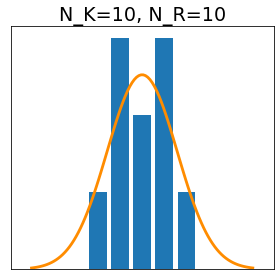

Experiment: mean=2.000 , std=3.755.
Gaussian: mu=5.000 , sigma=1.581


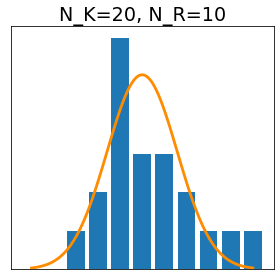

Experiment: mean=5.000 , std=5.505.
Gaussian: mu=5.000 , sigma=1.581


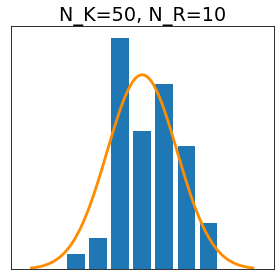

Experiment: mean=10.000 , std=10.913.
Gaussian: mu=5.000 , sigma=1.581


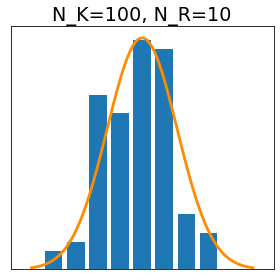

Experiment: mean=100.000 , std=130.127.
Gaussian: mu=5.000 , sigma=1.581


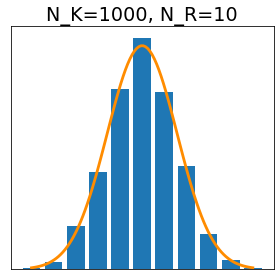

Experiment: mean=1000.000 , std=1310.153.
Gaussian: mu=5.000 , sigma=1.581


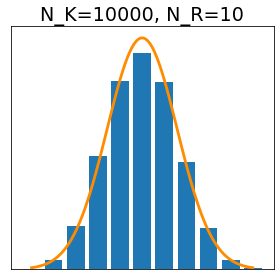

Experiment: mean=10000.000 , std=13231.938.
Gaussian: mu=5.000 , sigma=1.581


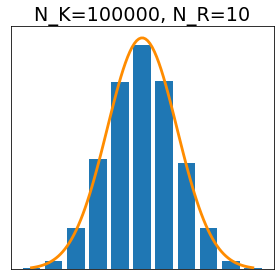

done.


In [22]:
N_Ks = np.array([10,20,50,100,1000,10000,100000])

N_R = 10
p_nail = 0.5 #here we can choose the quality of the nails...

print('running the code...')
for N_K in N_Ks:
    board = Galton(N_R, p_nail)
    board.run(N_K)
    board.plot(N_K,N_R)
print('done.')

Es werden ca. 100000 Kugeln benötigt, damit die Abweichung von der Gaußverteilung unter 1% fällt.

b)

running the code...
Experiment: mean=1000.000 , std=2360.652.
Gaussian: mu=50.000 , sigma=5.000


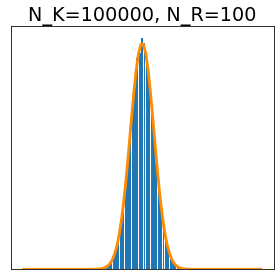

Experiment: mean=500.000 , std=1380.709.
Gaussian: mu=100.000 , sigma=7.071


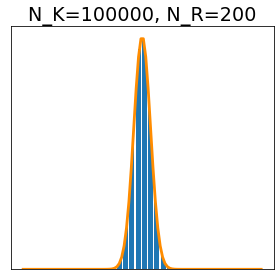

Experiment: mean=333.333 , std=1006.006.
Gaussian: mu=150.000 , sigma=8.660


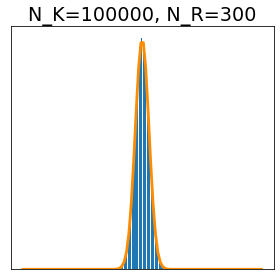

Experiment: mean=250.000 , std=805.612.
Gaussian: mu=200.000 , sigma=10.000


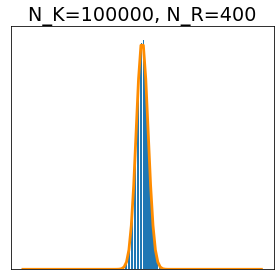

Experiment: mean=200.000 , std=683.479.
Gaussian: mu=250.000 , sigma=11.180


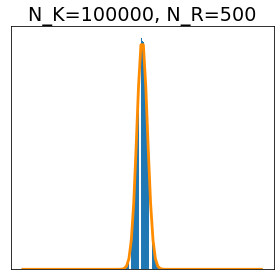

Experiment: mean=166.667 , std=611.668.
Gaussian: mu=300.000 , sigma=12.247


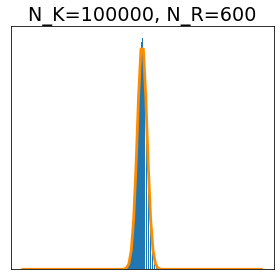

Experiment: mean=142.857 , std=572.576.
Gaussian: mu=350.000 , sigma=13.229


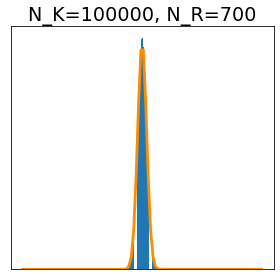

Experiment: mean=125.000 , std=557.384.
Gaussian: mu=400.000 , sigma=14.142


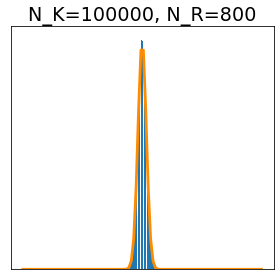

Experiment: mean=111.111 , std=558.093.
Gaussian: mu=450.000 , sigma=15.000


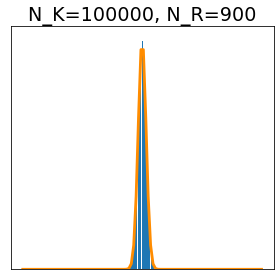

done.


In [27]:
N_Ks = 100000

N_Rs = np.arange(100,1000,100)
p_nail = 0.5 #here we can choose the quality of the nails...

print('running the code...')
for N_R in N_Rs:
    board = Galton(N_R, p_nail)
    board.run(N_K)
    board.plot(N_K,N_R)
print('done.')